# Json to CSV conversion

In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime
import time


# Device 1(D0:31:F7:A1:15:76)
data = [json.loads(line) for line in open('output_filename.json', 'r')]
df1 = json_normalize(data)
t= []
epoch_time = df1['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
df1.insert(0, 'Date Time',time_formatted)
df1.tail()
df1.to_csv('device76_sep20.csv')

<ipython-input-2-e4b8ac4e1278>:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df1 = json_normalize(data)


In [2]:
# Device 2(D0:31:F7:A1:15:76)
data = [json.loads(line) for line in open('device61_sep17.json', 'r')]
df1 = json_normalize(data)
t= []
epoch_time = df1['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
df1.insert(0, 'Date Time',time_formatted)
df1.tail()
df1.to_csv('device61_sep17.csv', index = False)

<ipython-input-2-4c0313e09613>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df1 = json_normalize(data)


In [3]:
# Device 3(D0:31:F7:A1:15:76)
data = [json.loads(line) for line in open('devicec5_sep17.json', 'r')]
df1 = json_normalize(data)
t= []
epoch_time = df1['data.timestamp'].astype(int)
time_formatted = epoch_time.apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t/1000.0)))
df1 = df1.drop(columns = {'receivedTimestamp', 'key'})
df1.insert(0, 'Date Time',time_formatted)
df1.tail()
df1.to_csv('devicec5_sep17.csv', index = False)

<ipython-input-3-72b720dcaa36>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df1 = json_normalize(data)


# Aeroqual and Megasense Data combined

## Laboratory NO2 Data

In [7]:
d1 = pd.read_csv("Megasense_device76//device1_data_2sep.csv",parse_dates=['Date Time'])
d2 = pd.read_csv("Megasense_device61//device2_data_2sep.csv", parse_dates=['Date Time'])


In [11]:
# Laboratory NO2
aero = pd.read_csv("Data//Aeroqual_NO2.csv",parse_dates=['Date Time'])
print(aero.dtypes)
print(aero.head())


Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 NO2(ppm)              float64
NO2_ppb                  int64
dtype: object
            Date Time   Monitor ID   Location ID   NO2(ppm)  NO2_ppb
0 2021-06-22 10:49:00            1             1      0.023       23
1 2021-06-22 10:50:00            1             1      0.013       13
2 2021-06-22 10:51:00            1             1      0.017       17
3 2021-06-22 10:52:00            1             1      0.017       17
4 2021-06-22 10:53:00            1             1      0.018       18


In [16]:
d1.set_index("Date Time", inplace = True)
D1 = d1.resample('T').mean().round(3)
d2.set_index("Date Time", inplace = True)
D2 = d2.resample('T').mean().round(3)

In [17]:
print(D1.head())
print(D2.head())

                     Unnamed: 0  data.temp_c  data.hum_prcnt  data.press_hpa  \
Date Time                                                                      
2021-07-19 15:00:00         0.5       30.635          54.945         935.490   
2021-07-19 15:01:00         2.0       30.430          55.417         935.476   
2021-07-19 15:02:00         NaN          NaN             NaN             NaN   
2021-07-19 15:03:00         3.0       30.330          55.816         935.434   
2021-07-19 15:04:00         4.5       30.250          56.131         935.397   

                     data.eq_db  data.onesmin_db  data.onesmax_db  \
Date Time                                                           
2021-07-19 15:00:00      41.351           39.411           48.490   
2021-07-19 15:01:00      44.281           40.191           55.782   
2021-07-19 15:02:00         NaN              NaN              NaN   
2021-07-19 15:03:00      54.582           39.780           73.578   
2021-07-19 15:04:00      

In [18]:
O1 = pd.merge(aero, D1, on = 'Date Time', how = 'inner')
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
print(O1.head())
print(O2.head())

Empty DataFrame
Columns: [Date Time,  Monitor ID,  Location ID,  NO2(ppm), NO2_ppb, Unnamed: 0, data.temp_c, data.hum_prcnt, data.press_hpa, data.eq_db, data.onesmin_db, data.onesmax_db, data.co_ppm, data.no2_ppb, data.co_mv, data.no2_mv, data.x_g, data.y_g, data.z_g, data.x_raw, data.y_raw, data.z_raw, data.lux_lx, data.uv_mwpm2, data.nc0p5_npcm3, data.nc1p0_npcm3, data.nc2p5_npcm3, data.nc4p0_npcm3, data.nc10p0_npcm3, data.mc1p0_ugpm3, data.mc2p5_ugpm3, data.mc4p0_ugpm3, data.mc10p0_ugpm3, data.typ_pm_um, data.ozone_ppm, data.ozone_volt_mv, data.tvoc_ppb, data.batt_prcnt, data.batt_volt, data.bme280_int, data.speco3_int, data.mic_int, data.mic4514_int, data.mic4514pre_int, data.sgpc3_int, data.sps30_int, data.sps30pre_int, data.lis3dh_int, data.si1133_int, data.batt_int, data.leds_on, data.code_version, data.gps_avg_snr, data.cell_strength_dbm, data.wifi_strength_dbm, data.wifi_strength_asl, data.location.lat, data.location.lon, data.location.acc, data.timestamp]
Index: []

[0 rows x

In [19]:
len(O2)

5671

In [20]:
list(O2)

['Date Time',
 ' Monitor ID',
 ' Location ID',
 ' NO2(ppm)',
 'NO2_ppb',
 'data.temp_c',
 'data.hum_prcnt',
 'data.press_hpa',
 'data.eq_db',
 'data.onesmin_db',
 'data.onesmax_db',
 'data.co_ppm',
 'data.no2_ppb',
 'data.co_mv',
 'data.no2_mv',
 'data.x_g',
 'data.y_g',
 'data.z_g',
 'data.x_raw',
 'data.y_raw',
 'data.z_raw',
 'data.lux_lx',
 'data.uv_mwpm2',
 'data.nc0p5_npcm3',
 'data.nc1p0_npcm3',
 'data.nc2p5_npcm3',
 'data.nc4p0_npcm3',
 'data.nc10p0_npcm3',
 'data.mc1p0_ugpm3',
 'data.mc2p5_ugpm3',
 'data.mc4p0_ugpm3',
 'data.mc10p0_ugpm3',
 'data.typ_pm_um',
 'data.ozone_ppm',
 'data.ozone_volt_mv',
 'data.tvoc_ppb',
 'data.batt_prcnt',
 'data.batt_volt',
 'data.bme280_int',
 'data.speco3_int',
 'data.mic_int',
 'data.mic4514_int',
 'data.mic4514pre_int',
 'data.sgpc3_int',
 'data.sps30_int',
 'data.sps30pre_int',
 'data.lis3dh_int',
 'data.si1133_int',
 'data.batt_int',
 'data.leds_on',
 'data.code_version',
 'data.gps_avg_snr',
 'data.cell_strength_dbm',
 'data.wifi_strength

In [21]:
O2 = O2[O2['data.temp_c'].notna()]

In [22]:
len(O2)

814

In [23]:
O2.to_csv('Mega_Aero_NO2.csv')

# Laboratory

In [25]:
# Laboratory CO
aero = pd.read_csv("Data//Aeroqual_CO.csv",parse_dates=['Date Time'])
print(aero.dtypes)
print(aero.head())

Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 CO_ppm                float64
dtype: object
            Date Time   Monitor ID   Location ID   CO_ppm
0 2021-06-26 19:38:00            1             1     1.04
1 2021-06-26 19:39:00            1             1     1.17
2 2021-06-26 19:40:00            1             1     1.17
3 2021-06-26 19:41:00            1             1     1.20
4 2021-06-26 19:42:00            1             1     1.19


In [26]:
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
print(O2.head())
print(len(O2))
O2 = O2[O2['data.temp_c'].notna()]
print(O2.head())

            Date Time   Monitor ID   Location ID   CO_ppm  data.temp_c  \
0 2021-06-26 19:38:00            1             1     1.04          NaN   
1 2021-06-26 19:39:00            1             1     1.17          NaN   
2 2021-06-26 19:40:00            1             1     1.17          NaN   
3 2021-06-26 19:41:00            1             1     1.20          NaN   
4 2021-06-26 19:42:00            1             1     1.19        31.56   

   data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0             NaN             NaN         NaN              NaN   
1             NaN             NaN         NaN              NaN   
2             NaN             NaN         NaN              NaN   
3             NaN             NaN         NaN              NaN   
4          33.685         938.261      52.168           50.082   

   data.onesmax_db  ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0              NaN  ...           NaN                NaN               NaN   
1 

In [27]:
len(O2)

213

In [28]:
O2.to_csv('Mega_Aero_CO.csv')

In [29]:
# Mobile CO
aero= pd.read_csv("Aeroqual_data//aeroqualco_270721.csv",parse_dates=['Date Time'])
print(aero.dtypes)
print(aero.head())

Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 CO_ppm                float64
dtype: object
            Date Time   Monitor ID   Location ID   CO_ppm
0 2021-07-27 13:29:00            1             1      0.0
1 2021-07-27 13:30:00            1             1      0.0
2 2021-07-27 13:31:00            1             1      0.0
3 2021-07-27 13:32:00            1             1      0.0
4 2021-07-27 13:33:00            1             1      0.0


In [30]:
O1 = pd.merge(aero, D1, on = 'Date Time', how = 'inner')
print(O1.head())
print(len(O1))
O1 = O1[O1['data.temp_c'].notna()]
print(O1.head())

            Date Time   Monitor ID   Location ID   CO_ppm  Unnamed: 0  \
0 2021-07-27 13:29:00            1             1      0.0         NaN   
1 2021-07-27 13:30:00            1             1      0.0         NaN   
2 2021-07-27 13:31:00            1             1      0.0         NaN   
3 2021-07-27 13:32:00            1             1      0.0         NaN   
4 2021-07-27 13:33:00            1             1      0.0         NaN   

   data.temp_c  data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0          NaN             NaN             NaN         NaN              NaN   
1          NaN             NaN             NaN         NaN              NaN   
2          NaN             NaN             NaN         NaN              NaN   
3          NaN             NaN             NaN         NaN              NaN   
4          NaN             NaN             NaN         NaN              NaN   

   ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0  ...           NaN     

In [31]:
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
print(O2.head())
print(len(O2))
O2 = O2[O2['data.temp_c'].notna()]
print(O2.head())

            Date Time   Monitor ID   Location ID   CO_ppm  data.temp_c  \
0 2021-07-27 13:29:00            1             1      0.0          NaN   
1 2021-07-27 13:30:00            1             1      0.0          NaN   
2 2021-07-27 13:31:00            1             1      0.0          NaN   
3 2021-07-27 13:32:00            1             1      0.0          NaN   
4 2021-07-27 13:33:00            1             1      0.0          NaN   

   data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0             NaN             NaN         NaN              NaN   
1             NaN             NaN         NaN              NaN   
2             NaN             NaN         NaN              NaN   
3             NaN             NaN         NaN              NaN   
4             NaN             NaN         NaN              NaN   

   data.onesmax_db  ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0              NaN  ...           NaN                NaN               NaN   
1 

In [35]:
print(len(O1))
print(len(O2))

182
29


In [34]:
O1.to_csv('Device1_Mobile&Aeroqual_CO.csv')
O2.to_csv('Device2_Mobile&Aeroqula_CO.csv')

In [33]:
# MObile NO2

aero= pd.read_csv("Aeroqual_data//aeroqual210821.csv",parse_dates=['Date Time'])
print(aero.dtypes)
print(aero.head())

Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 NO2(ppm)              float64
dtype: object
            Date Time   Monitor ID   Location ID   NO2(ppm)
0 2021-08-19 11:21:00            1             1      0.011
1 2021-08-19 11:22:00            1             1      0.006
2 2021-08-19 11:23:00            1             1      0.010
3 2021-08-19 11:24:00            1             1      0.012
4 2021-08-19 11:25:00            1             1      0.014


In [36]:
O1 = pd.merge(aero, D1, on = 'Date Time', how = 'inner')
print(O1.head())
print(len(O1))
O1 = O1[O1['data.temp_c'].notna()]
print(O1.head())

            Date Time   Monitor ID   Location ID   NO2(ppm)  Unnamed: 0  \
0 2021-08-19 11:21:00            1             1      0.011      7984.5   
1 2021-08-19 11:22:00            1             1      0.006      7986.5   
2 2021-08-19 11:23:00            1             1      0.010      7988.5   
3 2021-08-19 11:24:00            1             1      0.012         NaN   
4 2021-08-19 11:25:00            1             1      0.014         NaN   

   data.temp_c  data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0       35.695          39.449         938.045      58.665           41.994   
1       34.510          41.587         937.927      56.919           41.756   
2       33.770          43.105         937.933      58.127           43.612   
3          NaN             NaN             NaN         NaN              NaN   
4          NaN             NaN             NaN         NaN              NaN   

   ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0  ...       

In [37]:
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
print(O2.head())
print(len(O2))
O2 = O2[O2['data.temp_c'].notna()]
print(O2.head())

            Date Time   Monitor ID   Location ID   NO2(ppm)  data.temp_c  \
0 2021-08-19 11:21:00            1             1      0.011          NaN   
1 2021-08-19 11:22:00            1             1      0.006          NaN   
2 2021-08-19 11:23:00            1             1      0.010          NaN   
3 2021-08-19 11:24:00            1             1      0.012          NaN   
4 2021-08-19 11:25:00            1             1      0.014          NaN   

   data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
0             NaN             NaN         NaN              NaN   
1             NaN             NaN         NaN              NaN   
2             NaN             NaN         NaN              NaN   
3             NaN             NaN         NaN              NaN   
4             NaN             NaN         NaN              NaN   

   data.onesmax_db  ...  data.leds_on  data.code_version  data.gps_avg_snr  \
0              NaN  ...           NaN                NaN            

In [38]:
print(len(O1))
print(len(O2))

286
87


In [39]:
O1.to_csv('Device1_Mobile&Aeroqual_NO2.csv')
O2.to_csv('Device2_Mobile&Aeroqula_NO2.csv')

# 6th to 12th September

In [3]:
d1 = pd.read_csv("Megasense_device76//device76_sep17.csv",parse_dates=['Date Time'])
d2 = pd.read_csv("Megasense_device61//device61_sep17.csv", parse_dates=['Date Time'])
d3 = pd.read_csv("Megasense_deviceC5//devicec5_sep17.csv", parse_dates = ['Date Time'])


In [4]:
aero = pd.read_csv('Aeroqual_data//aeroqual_co_180921.csv', parse_dates = ['Date Time'])
aero.dtypes

Date Time       datetime64[ns]
 Monitor ID              int64
 Location ID             int64
 CO(ppm)               float64
dtype: object

In [5]:
aero.head()

,Date Time,Monitor ID,Location ID,CO(ppm)
0,2021-09-16 17:54:00,1,1,0.00
1,2021-09-16 17:55:00,1,1,0.00
2,2021-09-16 17:56:00,1,1,4.36
3,2021-09-16 17:57:00,1,1,5.07
4,2021-09-16 17:58:00,1,1,3.47


In [6]:
d1.set_index("Date Time", inplace = True)
D1 = d1.resample('T').mean().round(3)
d2.set_index("Date Time", inplace = True)
D2 = d2.resample('T').mean().round(3)
d3.set_index("Date Time", inplace = True)
D3 = d3.resample('T').mean().round(3)

In [7]:


O1 = pd.merge(aero, D1, on = 'Date Time', how = 'inner')
O2 = pd.merge(aero, D2, on = 'Date Time', how = 'inner')
O3 = pd.merge(aero, D3, on = 'Date Time', how = 'inner')
print(O1)
print(O2)
print(O3)

Empty DataFrame
Columns: [Date Time,  Monitor ID,  Location ID,  CO(ppm), Unnamed: 0, data.temp_c, data.hum_prcnt, data.press_hpa, data.eq_db, data.onesmin_db, data.onesmax_db, data.co_ppm, data.no2_ppb, data.co_mv, data.no2_mv, data.x_g, data.y_g, data.z_g, data.x_raw, data.y_raw, data.z_raw, data.lux_lx, data.uv_mwpm2, data.nc0p5_npcm3, data.nc1p0_npcm3, data.nc2p5_npcm3, data.nc4p0_npcm3, data.nc10p0_npcm3, data.mc1p0_ugpm3, data.mc2p5_ugpm3, data.mc4p0_ugpm3, data.mc10p0_ugpm3, data.typ_pm_um, data.ozone_ppm, data.ozone_volt_mv, data.tvoc_ppb, data.batt_prcnt, data.batt_volt, data.bme280_int, data.speco3_int, data.mic_int, data.mic4514_int, data.mic4514pre_int, data.sgpc3_int, data.sps30_int, data.sps30pre_int, data.lis3dh_int, data.si1133_int, data.batt_int, data.leds_on, data.code_version, data.gps_avg_snr, data.cell_strength_dbm, data.wifi_strength_dbm, data.wifi_strength_asl, data.location.lat, data.location.lon, data.location.acc, data.timestamp]
Index: []

[0 rows x 59 column

In [8]:
print(len(O1))
print(len(O2))
print(len(O3))

0
652
301


In [9]:
len(aero)

660

In [10]:

len(O2)
O2 = O2[O2['data.temp_c'].notna()]
print(O2.head())

             Date Time   Monitor ID   Location ID   CO(ppm)  data.temp_c  \
32 2021-09-16 18:26:00            1             1      0.00       31.150   
35 2021-09-16 18:29:00            1             1     24.05       31.125   
36 2021-09-16 18:30:00            1             1     24.23       31.130   
37 2021-09-16 18:31:00            1             1     24.25       31.180   
38 2021-09-16 18:32:00            1             1     24.30       31.225   

    data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
32          35.809         938.258      61.134           49.402   
35          36.122         938.273      56.861           53.295   
36          35.929         938.872      61.401           49.656   
37          35.932         938.316      49.309           48.265   
38          36.021         938.310      48.733           47.710   

    data.onesmax_db  ...  data.leds_on  data.code_version  data.gps_avg_snr  \
32           76.696  ...           1.0                1.0    

In [11]:
len(O2)

208

In [12]:
O3 = O3[O3['data.temp_c'].notna()]
print(O3.head())
print(len(O3))

            Date Time   Monitor ID   Location ID   CO(ppm)  data.temp_c  \
2 2021-09-16 17:56:00            1             1      4.36        30.41   
6 2021-09-16 18:00:00            1             1      0.00        30.40   
7 2021-09-16 18:01:00            1             1      0.00        30.42   
8 2021-09-16 18:02:00            1             1      0.00        30.32   
9 2021-09-16 18:03:00            1             1      0.00        30.39   

   data.hum_prcnt  data.press_hpa  data.eq_db  data.onesmin_db  \
2          51.707         937.623      55.425           49.062   
6          51.732         937.700      53.692           48.732   
7          47.386         937.741      59.878           42.308   
8          47.376         937.735      61.991           47.298   
9          45.892         937.784      56.570           51.352   

   data.onesmax_db  ...  data.leds_on  data.code_version  data.gps_avg_snr  \
2           61.811  ...           1.0                1.0               0.0

In [13]:
O2.to_csv('device61_sep17_Mega&Aero_CO.csv')
O3.to_csv('devicec5_sep17_Mega&Aero_CO.csv')

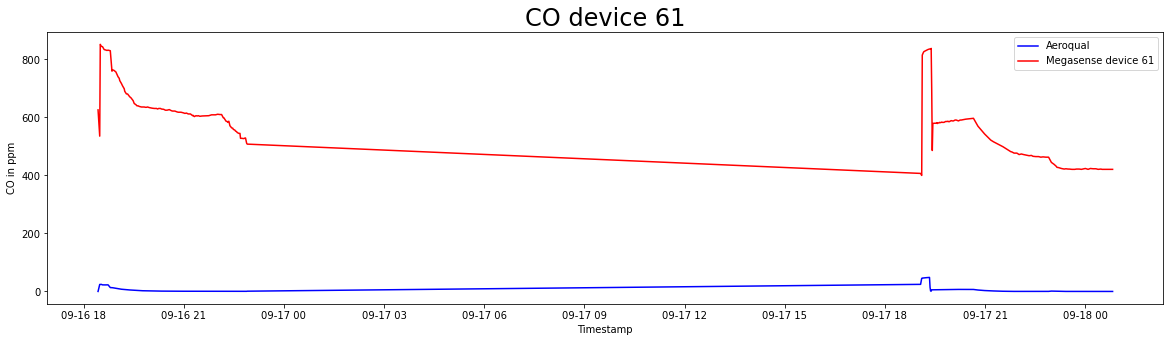

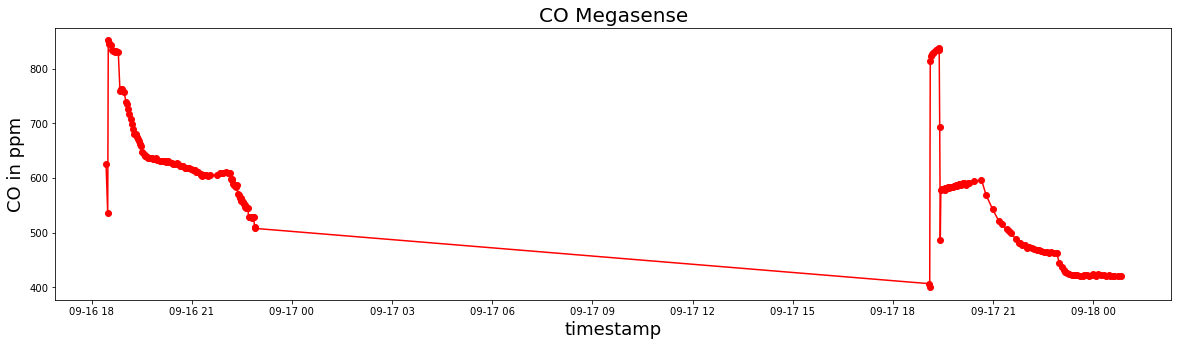

Text(0.5, 1.0, 'CO Aeroqual')

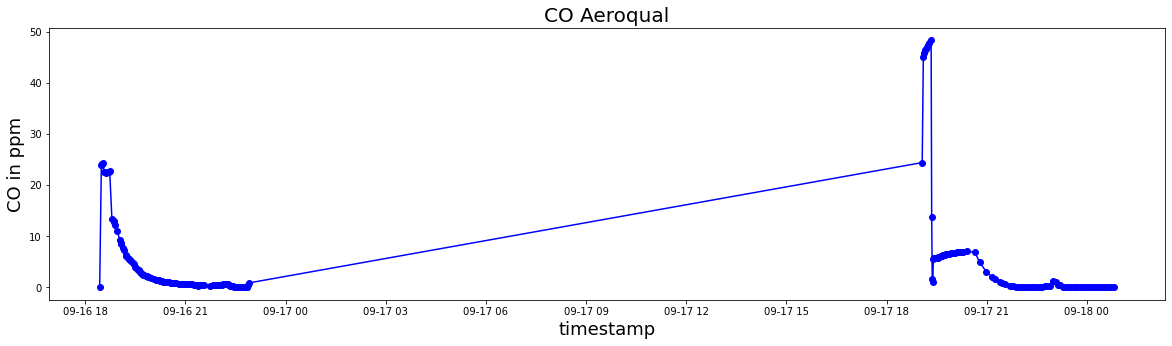

In [22]:
import matplotlib.pyplot as plt
x = O2['Date Time']
y1 = O2[' CO(ppm)']
y2 = O2['data.co_ppm']

fig = plt.figure(figsize = (20,5))
plt.plot(x, y1,'-b')
plt.plot(x, y2, '-r')
plt.xlabel('Timestamp')
plt.ylabel('CO in ppm')
plt.title('CO device 61', fontsize = 24)
plt.legend(['Aeroqual', 'Megasense device 61'])
plt.show()
fig= plt.figure(figsize=(20,5))
# plotting points as a scatter plot
plt.plot(x, y2, '-or')
plt.xlabel('timestamp', fontsize=18)
plt.ylabel('CO in ppm', fontsize=18)
#plt.legend(["Megasense", "Aeroqual"])
plt.title('CO Megasense', fontsize=20)
plt.show()

fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, '-ob')

plt.xlabel('timestamp', fontsize=18)
plt.ylabel('CO in ppm', fontsize=18)
#plt.legend(["Aeroqual"])
plt.title('CO Aeroqual', fontsize=20)

max correlation is at lag 2
max correlation is  0.713
Pearsons correlation: 0.584
MSE CO:  352393.805575
MAE CO:  583.7061538461538
RMSE CO:  593.6276657762844


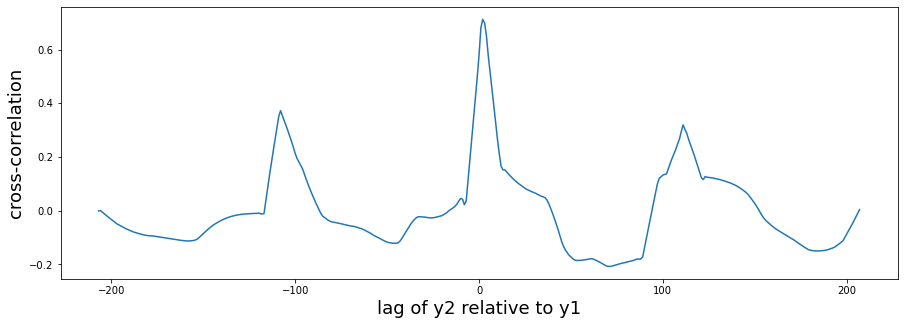

In [23]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
npts = len(O2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y2 - y2.mean(), y1 - y1.mean(), mode='full')
ccor = ccov / (npts * y2.std() * y1.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation', fontsize = 18)
plt.xlabel('lag of y2 relative to y1', fontsize =18)

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y2, y1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y2, y1)
MAE = mean_absolute_error(y2, y1)
print("MSE CO: ", MSE)
print("MAE CO: ", MAE)
print("RMSE CO: ", np.sqrt(mean_squared_error(y2, y1)))

In [27]:
O2 = O2[O2[' CO(ppm)']<25]

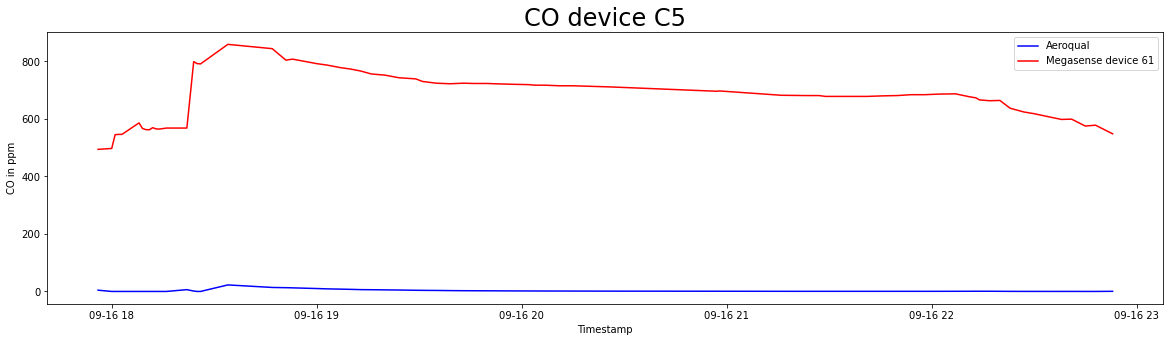

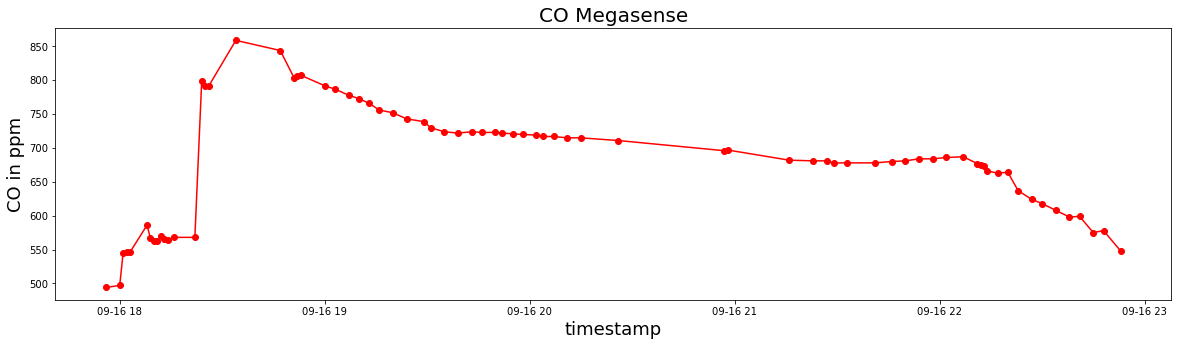

Text(0.5, 1.0, 'CO Aeroqual')

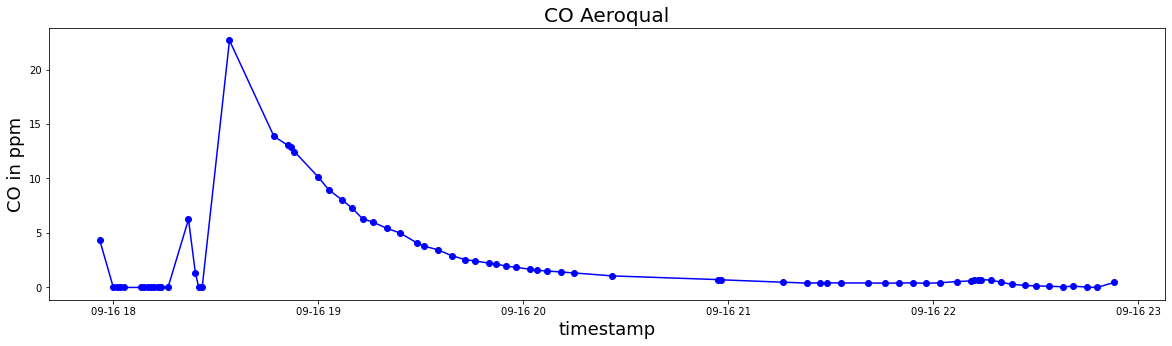

In [24]:
x = O3['Date Time']
y1 = O3[' CO(ppm)']
y2 = O3['data.co_ppm']

fig = plt.figure(figsize = (20,5))
plt.plot(x, y1,'-b')
plt.plot(x, y2, '-r')
plt.xlabel('Timestamp')
plt.ylabel('CO in ppm')
plt.title('CO device C5', fontsize = 24)
plt.legend(['Aeroqual', 'Megasense device 61'])
plt.show()
fig= plt.figure(figsize=(20,5))
# plotting points as a scatter plot
plt.plot(x, y2, '-or')
plt.xlabel('timestamp', fontsize=18)
plt.ylabel('CO in ppm', fontsize=18)
#plt.legend(["Megasense", "Aeroqual"])
plt.title('CO Megasense', fontsize=20)
plt.show()

fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, '-ob')

plt.xlabel('timestamp', fontsize=18)
plt.ylabel('CO in ppm', fontsize=18)
#plt.legend(["Aeroqual"])
plt.title('CO Aeroqual', fontsize=20)

max correlation is at lag -3
max correlation is  0.629
Pearsons correlation: 0.632
MSE CO:  464045.10132770665
MAE CO:  676.2096
RMSE CO:  681.2085593470671


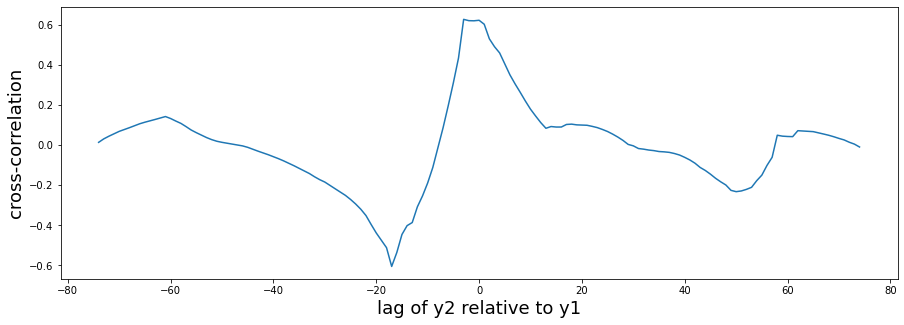

In [25]:
npts = len(O3)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y2 - y2.mean(), y1 - y1.mean(), mode='full')
ccor = ccov / (npts * y2.std() * y1.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation', fontsize = 18)
plt.xlabel('lag of y2 relative to y1', fontsize =18)

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y2, y1) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(y2, y1)
MAE = mean_absolute_error(y2, y1)
print("MSE CO: ", MSE)
print("MAE CO: ", MAE)
print("RMSE CO: ", np.sqrt(mean_squared_error(y2, y1)))